In [9]:

from jgtml import jtc
from jgtpy import ads
from jgtml import jplt
from jgtpy import mksg

from jgtutils.jgtconstants import *



# --@STCIssue 

## Counting the amount there is in the Window of the proto FDB/AO Win to have an idea how many lags we need in the learning datasets

In [10]:

i="GBP/USD";t="H8"
i="GBP/USD";t="D1"
crop_dt_last="2023-07-16 21:00"
crop_dt_last_EXIT_DATE="2023-10-16 21:00"
DO_CROP = True

In [14]:
if DO_CROP:
    srcmxdf = jtc.readMXFile(i,t,crop_last_dt=crop_dt_last)
else:
  srcmxdf = jtc.readMXFile(i,t)

srcmxdf_EXIT_DATE = jtc.readMXFile(i,t,crop_last_dt=crop_dt_last_EXIT_DATE)

In [15]:
srcmxdf_EXIT_DATE.tail(10)


,High,Low,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb
Date,,,,,,,,,,,,,,,,
2023-10-05 21:00:00,1.226150,1.210575,-0.378512,0.036531,1.242106,1.229529,1.219322,1,0,0.0,0.0,0.0,0.0,0.0,[],[]
2023-10-07 21:00:00,1.224375,1.219820,-0.342346,0.101945,1.240194,1.227752,1.217601,0,0,0.0,0.0,0.0,0.0,0.0,[],[]
2023-10-08 21:00:00,1.224435,1.216310,-0.287088,0.193799,1.238841,1.225246,1.217119,0,0,0.0,0.0,0.0,0.0,0.0,[],[]
2023-10-09 21:00:00,1.229175,1.221190,-0.225376,0.272246,1.237356,1.223430,1.217368,0,0,0.0,0.0,0.0,0.0,0.0,[],[]
2023-10-10 21:00:00,1.233770,1.226895,-0.163425,0.316231,1.235661,1.222400,1.218314,1,0,0.0,0.0,0.0,0.0,0.0,[],[]
2023-10-11 21:00:00,1.233170,1.217165,-0.126059,0.280427,1.233510,1.221895,1.218725,0,0,0.0,0.0,0.0,0.0,0.0,[],[]
2023-10-12 21:00:00,1.222550,1.212255,-0.121837,0.171639,1.231757,1.221921,1.220017,0,1,0.0,0.0,0.0,0.0,0.0,[],[]
2023-10-14 21:00:00,1.214545,1.212830,-0.120847,0.083643,1.230483,1.221727,1.222080,0,0,0.0,0.0,0.0,0.0,0.0,[],[]
2023-10-15 21:00:00,1.221970,1.213440,-0.125439,0.016592,1.229550,1.222159,1.222697,0,0,0.0,0.0,0.0,0.0,0.0,[],[]


In [12]:
srcmxdf.tail(1)

,High,Low,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb
Date,,,,,,,,,,,,,,,,
2023-07-16 21:00:00,1.31104,1.305105,0.467818,0.237115,1.266789,1.275107,1.28669,0,0,0.0,1.0,0.0,0.0,974.0,"[0.022573785, 0.0600686254, 0.1147512372, 0.17...",[]


In [13]:
srcmxdf.columns


Index(['High', 'Low', 'ao', 'ac', 'jaw', 'teeth', 'lips', 'fh', 'fl', 'fdbb',
       'fdbs', 'zlcb', 'zlcs', 'target', 'vector_ao_fdbs', 'vector_ao_fdbb'],
      dtype='object')

In [16]:

#Index(['Volume', 'Open', 'High', 'Low', 'Close', 'Median', 'ao', 'ac', 'jaw',
      #  'teeth', 'lips', 'fh', 'fl', 'fh3', 'fl3', 'fh5', 'fl5', 'fh8', 'fl8',
      #  'fh13', 'fl13', 'fh21', 'fl21', 'fh34', 'fl34', 'fh55', 'fl55', 'fh89',
      #  'fl89', 'fdbb', 'fdbs', 'fdb', 'aof', 'aofvalue', 'aoaz', 'aobz', 'zlc',
      #  'zlcb', 'zlcs', 'aocolor', 'accolor', 'zcol', 'sz', 'bz', 'acs', 'acb',
      #  'ss', 'sb', 'price_peak_above', 'price_peak_bellow', 'ao_peak_above',
      #  'ao_peak_bellow', 'target', 'vector_ao_fdbs', 'vector_ao_fdbb'],
# Remove columns : 'Median', 'fh3', 'fl3', 'fh5', 'fl5', 'fh8', 'fl8','fh13', 'fl13', 'fh21', 'fl21', 'fh34', 'fl34', 'fh55', 'fl55', 'fh89','fl89','fdb', 'aof', 'aofvalue', 'aoaz', 'aobz', 'aocolor', 'accolor', 'zcol', 'sz', 'bz', 'acs', 'acb','ss', 'sb', 'price_peak_above', 'price_peak_bellow', 'ao_peak_bellow',
col_2_remove = ['Median', 'fh3', 'fl3', 'fh5', 'fl5', 'fh8', 'fl8','fh13', 'fl13', 'fh21', 'fl21', 'fh34', 'fl34', 'fh55', 'fl55', 'fh89','fl89','fdb', 'aof', 'aofvalue', 'aoaz', 'aobz', 'aocolor', 'accolor', 'zcol', 'sz', 'bz', 'acs', 'acb','ss', 'sb', 'price_peak_above', 'price_peak_bellow', 'ao_peak_bellow','ao_peak_above','zlc']
try:
      mxdf = srcmxdf.drop(col_2_remove, axis=1).copy()
except:
      mxdf = srcmxdf.copy()
try:
      mxdf_EXIT = srcmxdf_EXIT_DATE.drop(col_2_remove, axis=1).copy()
except:
      mxdf_EXIT = srcmxdf_EXIT_DATE.copy()




## Profit/Losses DF
### Just FDB Signals

In [17]:
#'target', 'vector_ao_fdbs', 'vector_ao_fdbb'
#select where target is not 0
mxdf_fdb = mxdf[mxdf[FDB_TARGET]!=0]
mxdf_fdb_EXIT = mxdf_EXIT[mxdf_EXIT[FDB_TARGET]!=0]


In [18]:
mxdf_fdb.tail(5)

,High,Low,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb
Date,,,,,,,,,,,,,,,,
2023-06-01 21:00:00,1.254490,1.244165,-0.092963,0.157831,1.247492,1.243050,1.239081,1,0,0.0,1.0,0.0,0.0,-103.0,[],[]
2023-06-11 21:00:00,1.259950,1.248695,0.022574,0.135388,1.243358,1.242791,1.242782,0,0,0.0,1.0,1.0,0.0,-113.0,[0.022573785],[]
2023-06-21 21:00:00,1.284555,1.272590,0.397813,0.169539,1.245907,1.252527,1.265132,1,0,0.0,1.0,0.0,0.0,-120.0,"[0.022573785, 0.0600686254, 0.1147512372, 0.17...",[]
2023-07-13 21:00:00,1.314310,1.308950,0.384982,0.266238,1.265213,1.271914,1.278459,1,0,0.0,1.0,0.0,0.0,1013.0,"[0.022573785, 0.0600686254, 0.1147512372, 0.17...",[]
2023-07-16 21:00:00,1.311040,1.305105,0.467818,0.237115,1.266789,1.275107,1.286690,0,0,0.0,1.0,0.0,0.0,974.0,"[0.022573785, 0.0600686254, 0.1147512372, 0.17...",[]


## Select Window

### 2 Datasets - FDBS/FDBB 


In [19]:
#'target', 'vector_ao_fdbs', 'vector_ao_fdbb'
#select where 'vector_ao_fdbs' not []
mxdf_fdbs = mxdf_fdb[mxdf_fdb[VECTOR_AO_FDBS]!='[]'].copy()
mxdf_fdbb = mxdf_fdb[mxdf_fdb[VECTOR_AO_FDBB]!='[]'].copy()

mxdf_fdbs_EXIT = mxdf_fdb_EXIT[mxdf_fdb_EXIT[VECTOR_AO_FDBS]!='[]'].copy()
mxdf_fdbb_EXIT = mxdf_fdb_EXIT[mxdf_fdb_EXIT[VECTOR_AO_FDBB]!='[]'].copy()

In [20]:
mxdf_fdbs.tail(5)

,High,Low,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb
Date,,,,,,,,,,,,,,,,
2023-05-09 21:00:00,1.267985,1.260260,0.223328,0.082559,1.242649,1.248659,1.255021,1,0,0.0,1.0,0.0,0.0,-77.0,"[0.0150048301, 0.0803220264, 0.0985903602, 0.1...",[]
2023-06-11 21:00:00,1.259950,1.248695,0.022574,0.135388,1.243358,1.242791,1.242782,0,0,0.0,1.0,1.0,0.0,-113.0,[0.022573785],[]
2023-06-21 21:00:00,1.284555,1.272590,0.397813,0.169539,1.245907,1.252527,1.265132,1,0,0.0,1.0,0.0,0.0,-120.0,"[0.022573785, 0.0600686254, 0.1147512372, 0.17...",[]
2023-07-13 21:00:00,1.314310,1.308950,0.384982,0.266238,1.265213,1.271914,1.278459,1,0,0.0,1.0,0.0,0.0,1013.0,"[0.022573785, 0.0600686254, 0.1147512372, 0.17...",[]
2023-07-16 21:00:00,1.311040,1.305105,0.467818,0.237115,1.266789,1.275107,1.286690,0,0,0.0,1.0,0.0,0.0,974.0,"[0.022573785, 0.0600686254, 0.1147512372, 0.17...",[]


In [21]:
mxdf_fdbb.tail(5)

,High,Low,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb
Date,,,,,,,,,,,,,,,,
2023-02-19 22:00:00,1.205715,1.201465,-0.266365,-0.140729,1.219533,1.215834,1.210205,0,0,1.0,0.0,0.0,0.0,-43.0,[],"[-0.0462189696, -0.1351340089, -0.2075177301, ..."
2023-03-07 22:00:00,1.185960,1.180275,-0.176650,-0.044310,1.208603,1.204123,1.201943,0,1,1.0,0.0,0.0,0.0,1276.0,[],"[-0.0462189696, -0.1351340089, -0.2075177301, ..."
2023-05-16 21:00:00,1.251065,1.242175,-0.013554,-0.208481,1.248640,1.255684,1.254488,0,0,1.0,0.0,0.0,1.0,-89.0,[],[-0.0135542629]
2023-05-22 21:00:00,1.244690,1.237285,-0.081472,-0.076894,1.250622,1.252046,1.248887,0,0,1.0,0.0,0.0,0.0,-74.0,[],"[-0.0135542629, -0.0289271344, -0.0364267133, ..."
2023-05-28 21:00:00,1.237230,1.233485,-0.176646,-0.112225,1.249302,1.247859,1.243034,0,0,1.0,0.0,0.0,0.0,-37.0,[],"[-0.0135542629, -0.0289271344, -0.0364267133, ..."


### Wave

#### Count of AO's Bars

In [22]:
#'vector_ao_fdbs_count'
mxdf_fdbs.loc[:, VECTOR_AO_FDBS_COUNT] = mxdf_fdbs[VECTOR_AO_FDBS].apply(lambda x: len(x.split(','))).copy()
mxdf_fdbb.loc[:, VECTOR_AO_FDBB_COUNT] = mxdf_fdbb[VECTOR_AO_FDBB].apply(lambda x: len(x.split(','))).copy()

mxdf_fdbs_EXIT.loc[:, 'vector_ao_fdbs_count'] = mxdf_fdbs_EXIT['vector_ao_fdbs'].apply(lambda x: len(x.split(','))).copy()
mxdf_fdbb_EXIT.loc[:, 'vector_ao_fdbb_count'] = mxdf_fdbb_EXIT['vector_ao_fdbb'].apply(lambda x: len(x.split(','))).copy()


In [13]:

mxdf_fdbs.tail(4)

,Volume,Open,High,Low,Close,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb,vector_ao_fdbs_count
Date,,,,,,,,,,,,,,,,,,,,
2023-06-11 21:00:00,254221,1.258010,1.259950,1.248695,1.250845,0.009788,0.070074,1.243358,1.242791,1.242782,0,0,0.0,1.0,1.0,0.0,-113.0,[0.0097884915],[],1
2023-06-21 21:00:00,402470,1.277055,1.284555,1.272590,1.274765,0.172500,0.087750,1.245907,1.252527,1.265132,1,0,0.0,1.0,0.0,0.0,-120.0,"[0.0097884915, 0.026047082, 0.0497586697, 0.07...",[],9
2023-07-13 21:00:00,321942,1.313560,1.314310,1.308950,1.309325,0.166937,0.137800,1.265213,1.271914,1.278459,1,0,0.0,1.0,0.0,0.0,1013.0,"[0.0097884915, 0.026047082, 0.0497586697, 0.07...",[],28
2023-07-16 21:00:00,269420,1.309265,1.311040,1.305105,1.307325,0.202856,0.122727,1.266789,1.275107,1.286690,0,0,0.0,1.0,0.0,0.0,974.0,"[0.0097884915, 0.026047082, 0.0497586697, 0.07...",[],30


In [14]:
mxdf_fdbb.tail(4)

,Volume,Open,High,Low,Close,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb,vector_ao_fdbb_count
Date,,,,,,,,,,,,,,,,,,,,
2023-03-07 22:00:00,443420,1.182795,1.185960,1.180275,1.184410,-0.076599,-0.022934,1.208603,1.204123,1.201943,0,1,1.0,0.0,0.0,0.0,775.0,[],"[-0.0200415655, -0.0585970895, -0.0899842689, ...",27
2023-05-16 21:00:00,303077,1.248810,1.251065,1.242175,1.248685,-0.005877,-0.107906,1.248640,1.255684,1.254488,0,0,1.0,0.0,0.0,1.0,-89.0,[],[-0.0058774276],1
2023-05-22 21:00:00,362110,1.243695,1.244690,1.237285,1.241265,-0.035328,-0.039799,1.250622,1.252046,1.248887,0,0,1.0,0.0,0.0,0.0,-74.0,[],"[-0.0058774276, -0.012543444, -0.015795427, -0...",6
2023-05-28 21:00:00,149525,1.234355,1.237230,1.233485,1.235465,-0.076597,-0.058086,1.249302,1.247859,1.243034,0,0,1.0,0.0,0.0,0.0,763.0,[],"[-0.0058774276, -0.012543444, -0.015795427, -0...",11


### FDB B/S 
#### Profits and Losses

In [15]:

# Get the Minimum value of 'vector_ao_fdbs_count' when 'target' has profits (target>0)

mxdf_fdbs_profits = mxdf_fdbs[mxdf_fdbs['target']>0].copy()

mxdf_fdbs_losses = mxdf_fdbs[mxdf_fdbs['target']<0].copy()

mxdf_fdbb_profits = mxdf_fdbb[mxdf_fdbb['target']>0].copy()

mxdf_fdbb_losses = mxdf_fdbb[mxdf_fdbb['target']<0].copy()

mxdf_fdbs_profits_EXIT = mxdf_fdbs_EXIT[mxdf_fdbs_EXIT['target']>0].copy()

mxdf_fdbs_losses_EXIT = mxdf_fdbs_EXIT[mxdf_fdbs_EXIT['target']<0].copy()

mxdf_fdbb_profits_EXIT = mxdf_fdbb_EXIT[mxdf_fdbb_EXIT['target']>0].copy()

mxdf_fdbb_losses_EXIT = mxdf_fdbb_EXIT[mxdf_fdbb_EXIT['target']<0].copy()

In [16]:
mxdf_fdbs_losses.tail(1)


,Volume,Open,High,Low,Close,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb,vector_ao_fdbs_count
Date,,,,,,,,,,,,,,,,,,,,
2023-06-21 21:00:00,402470,1.277055,1.284555,1.27259,1.274765,0.1725,0.08775,1.245907,1.252527,1.265132,1,0,0.0,1.0,0.0,0.0,-120.0,"[0.0097884915, 0.026047082, 0.0497586697, 0.07...",[],9


In [17]:
mxdf_fdbb_losses.tail(1)

,Volume,Open,High,Low,Close,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb,vector_ao_fdbb_count
Date,,,,,,,,,,,,,,,,,,,,
2023-05-22 21:00:00,362110,1.243695,1.24469,1.237285,1.241265,-0.035328,-0.039799,1.250622,1.252046,1.248887,0,0,1.0,0.0,0.0,0.0,-74.0,[],"[-0.0058774276, -0.012543444, -0.015795427, -0...",6


In [18]:
mxdf_fdbs_profits.tail(1)

,Volume,Open,High,Low,Close,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb,vector_ao_fdbs_count
Date,,,,,,,,,,,,,,,,,,,,
2023-07-16 21:00:00,269420,1.309265,1.31104,1.305105,1.307325,0.202856,0.122727,1.266789,1.275107,1.28669,0,0,0.0,1.0,0.0,0.0,974.0,"[0.0097884915, 0.026047082, 0.0497586697, 0.07...",[],30


In [19]:
mxdf_fdbb_profits.tail(1)

,Volume,Open,High,Low,Close,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb,vector_ao_fdbb_count
Date,,,,,,,,,,,,,,,,,,,,
2023-05-28 21:00:00,149525,1.234355,1.23723,1.233485,1.235465,-0.076597,-0.058086,1.249302,1.247859,1.243034,0,0,1.0,0.0,0.0,0.0,763.0,[],"[-0.0058774276, -0.012543444, -0.015795427, -0...",11


In [20]:

len(mxdf_fdbs_losses)


427

## Plotting
### Losses vs AO Bars Amount

In [21]:

# Plot the distribution of 'vector_ao_fdbs_count' when 'target' has profits (target>0) vector_ao_fdbs_count
columns_plot01_fdbs = ['vector_ao_fdbs_count', 'target']
columns_plot01b_fdbs = ['vector_ao_fdbs_count', 'target']

ds_vec_ao_fdbs_cnt__targets_profits = mxdf_fdbs_profits[columns_plot01_fdbs]
ds_vec_ao_fdbs_cnt__targets_ALL = mxdf_fdbs[columns_plot01_fdbs]

ds_vec_ao_fdbs_cnt__targets_losses = mxdf_fdbs_losses[columns_plot01b_fdbs]

columns_plot01_fdbb = ['vector_ao_fdbb_count', 'target']
columns_plot01b_fdbb = ['vector_ao_fdbb_count', 'target']
ds_vec_ao_fdbb_cnt__targets_profits = mxdf_fdbb_profits[columns_plot01_fdbb]
ds_vec_ao_fdbb_cnt__targets_losses = mxdf_fdbb_losses[columns_plot01b_fdbb]

In [22]:
print(ds_vec_ao_fdbs_cnt__targets_profits.tail(1), ds_vec_ao_fdbs_cnt__targets_losses.tail(1), ds_vec_ao_fdbb_cnt__targets_profits.tail(1), ds_vec_ao_fdbb_cnt__targets_losses.tail(1))

                     vector_ao_fdbs_count  target
Date                                             
2023-07-16 21:00:00                    30   974.0                      vector_ao_fdbs_count  target
Date                                             
2023-06-21 21:00:00                     9  -120.0                      vector_ao_fdbb_count  target
Date                                             
2023-05-28 21:00:00                    11   763.0                      vector_ao_fdbb_count  target
Date                                             
2023-05-22 21:00:00                     6   -74.0


In [23]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#### an_bivariate_plot00

##### Exploring Distribution of Vector AO FDBS 

Count vs Target

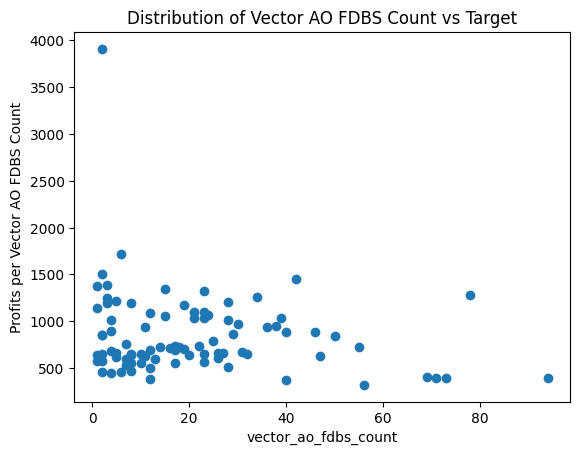

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
#ds_vec_ao_fdbs_cnt__targets_profits
feature1 = 'vector_ao_fdbs_count'
target_var = 'target'
title_chart = 'Distribution of Vector AO FDBS Count vs Target'
x_label = 'vector_ao_fdbs_count'
y_label = 'Profits per Vector AO FDBS Count'
jplt.an_bivariate_plot00(ds_vec_ao_fdbs_cnt__targets_profits, feature1, target_var, title_chart, x_label,  y_label,show=True,title_as_is=True,ylabel_as_is=True,xlabel_as_is=True)

# PairPlot

## FDBS Profit

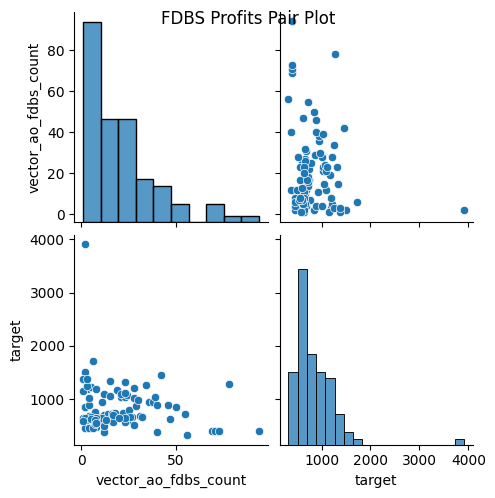

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [25]:
pair_plot_title = "FDBS Profits Pair Plot"
jplt.pairplot(ds_vec_ao_fdbs_cnt__targets_profits,show=True,title=pair_plot_title)

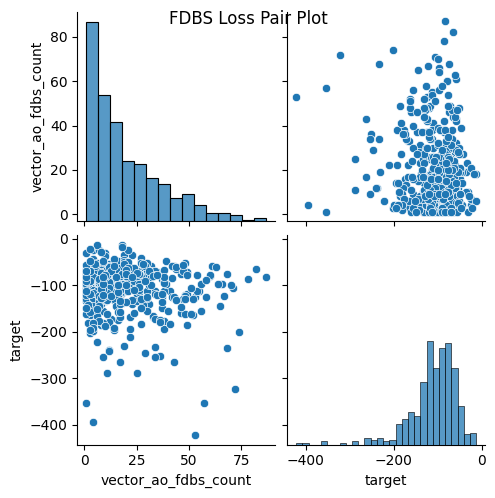

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [26]:

pair_plot_title = "FDBS Loss Pair Plot"
jplt.pairplot(ds_vec_ao_fdbs_cnt__targets_losses,show=True,title=pair_plot_title)

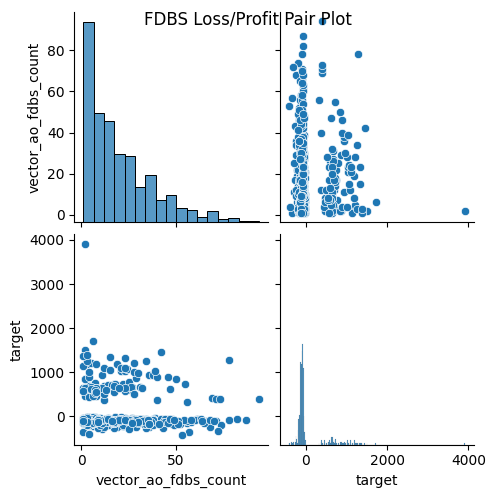

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [27]:



pair_plot_title = "FDBS Loss/Profit Pair Plot"

jplt.pairplot(ds_vec_ao_fdbs_cnt__targets_ALL,show=True,title=pair_plot_title)


## Observations

### 

## FDBS Profits n Losses

In [28]:
ds_vec_ao_fdbs_cnt__targets_ALL.tail(11)


,vector_ao_fdbs_count,target
Date,,
2023-03-21 21:00:00,8,-128.0
2023-03-22 21:00:00,9,-83.0
2023-03-28 21:00:00,14,-59.0
2023-03-30 21:00:00,16,-99.0
2023-04-13 21:00:00,27,-148.0
2023-05-07 21:00:00,47,-56.0
2023-05-09 21:00:00,49,-77.0
2023-06-11 21:00:00,1,-113.0
2023-06-21 21:00:00,9,-120.0


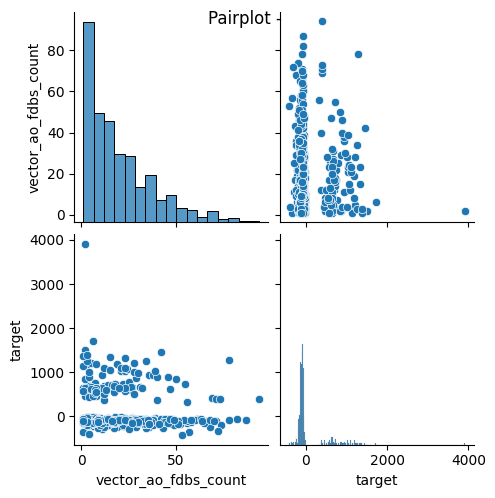

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [29]:
#ds_vec_ao_fdbs_cnt__targets_ALL
jplt.pairplot(ds_vec_ao_fdbs_cnt__targets_ALL,show=True)

## Why is "2023-05-09 21:00:00" has 49 AO Bars and a loss ?

DEBUG:: nb_to_select: 389
DEBUG:: len selected: 389


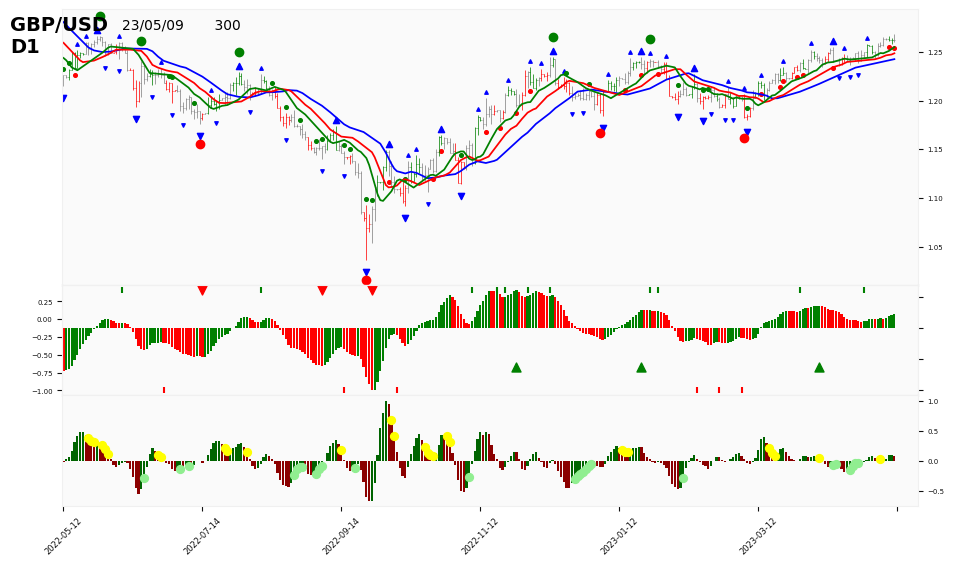

In [30]:
crop_dt_last_230509="2023-05-09 21:00:00"
chart230509,_ax,cdsdf230509 = ads.plot(i,t,crop_last_dt=crop_dt_last_230509,show=True)


DEBUG:: nb_to_select: 389
DEBUG:: len selected: 389


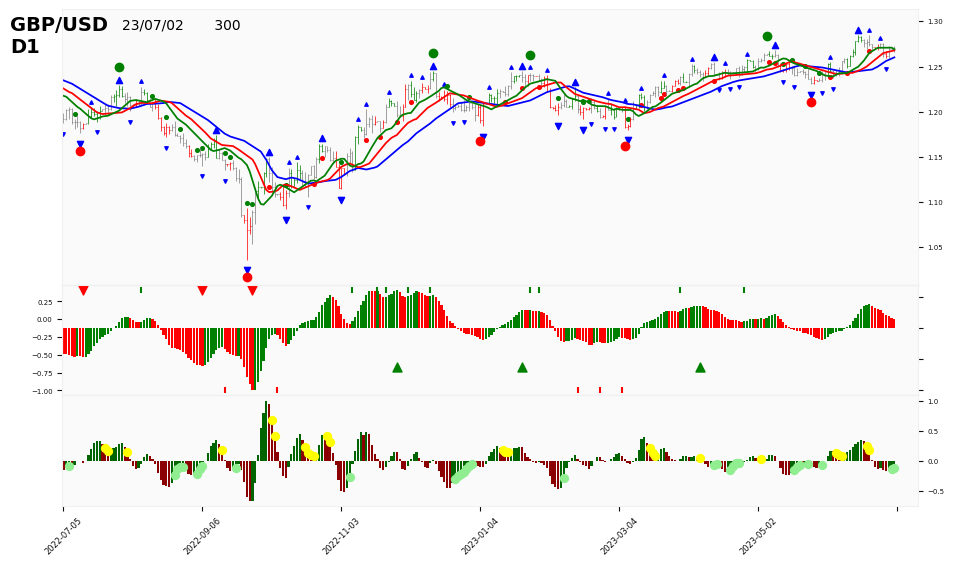

In [31]:

crop_dt_last_230509_40bars_later="2023-07-02 21:00:00"
chart230509_40bars_later,_ax_40bars_later,cdsdf230509_40bars_later = ads.plot(i,t,crop_last_dt=crop_dt_last_230509_40bars_later,show=True)


DEBUG:: nb_to_select: 389
DEBUG:: len selected: 389


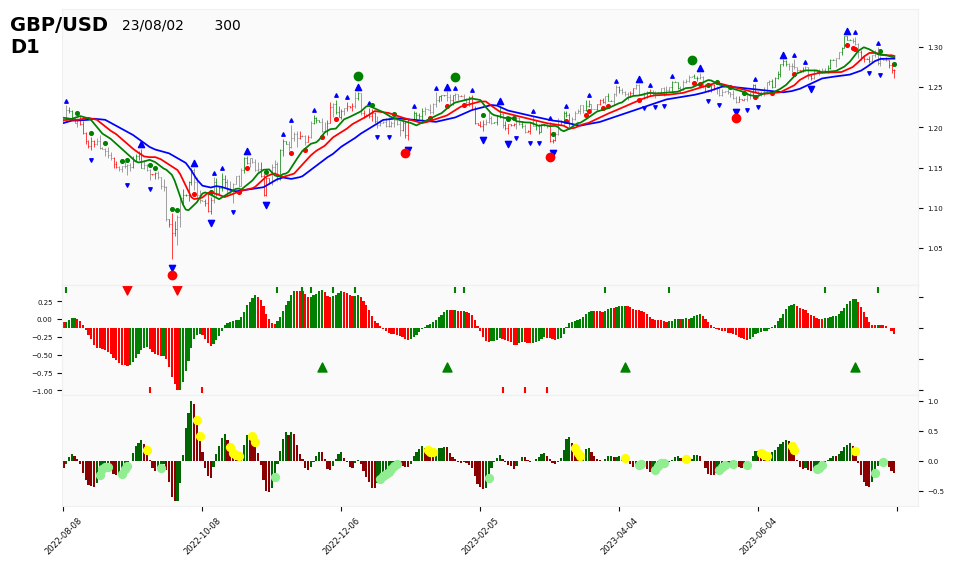

In [32]:


crop_dt_last_230509_70bars_later="2023-08-02 21:00:00"
chart230509_70bars_later,_ax_70bars_later,cdsdf230509_70bars_later = ads.plot(i,t,crop_last_dt=crop_dt_last_230509_70bars_later,show=True)


### 4 ADS Plot in 1 Grid

 #### NOT SO INTERESTING 

  an_biv_plt2ds

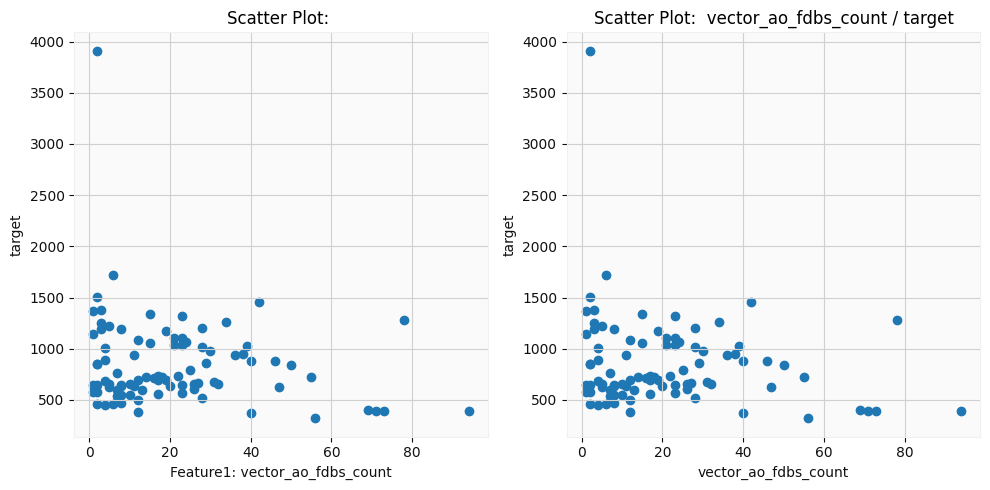

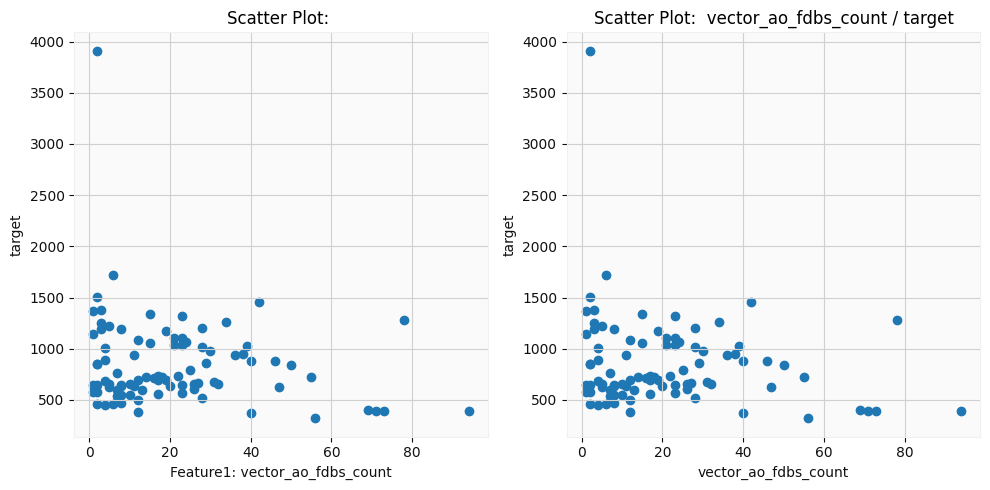

In [33]:
#### an_biv_plt2ds
jplt.an_biv_plt2ds(ds_vec_ao_fdbs_cnt__targets_profits,ds_vec_ao_fdbs_cnt__targets_profits, feature1,feature1, target_var)

In [34]:


ds_vec_ao_fdbs_cnt__targets_profits

,vector_ao_fdbs_count,target
Date,,
1993-09-13 21:00:00,17,735.0
1993-09-15 21:00:00,19,700.0
1994-10-25 21:00:00,36,940.0
1994-10-27 21:00:00,38,945.0
1995-03-06 22:00:00,10,551.0
...,...,...
2022-01-16 22:00:00,20,636.0
2022-02-17 22:00:00,1,1372.0
2022-02-20 22:00:00,3,1383.0


In [35]:
#an_biv_plt2ds


#### an_bivariate_plot00_four_features_v2

In [36]:

#an_bivariate_plot00_four_features_v2
feature1 = 'vector_ao_fdbs_count'
target_var = 'target'
feature2 = 'vector_ao_fdbs_count'

## --@STCIssue Clean Outliars
### --@q What is the minimal AO above/bellow for an FDB Signal to be valid ?

In [37]:
minimal_amount_of_ao_bars_to_clean_outliars = 12


In [38]:

mxdf_profits_fdbs_cleared = mxdf_fdbs_profits[mxdf_fdbs_profits['vector_ao_fdbs_count']>=minimal_amount_of_ao_bars_to_clean_outliars]

In [39]:
mxdf_fdbs_profits

,Volume,Open,High,Low,Close,ao,ac,jaw,teeth,lips,fh,fl,fdbb,fdbs,zlcb,zlcs,target,vector_ao_fdbs,vector_ao_fdbb,vector_ao_fdbs_count
Date,,,,,,,,,,,,,,,,,,,,
1993-09-13 21:00:00,0,1.555250,1.560250,1.541750,1.546750,0.268535,0.197889,1.496561,1.504034,1.519121,0,0,0.0,1.0,0.0,0.0,735.0,"[0.0261910638, 0.0689598999, 0.0859993221, 0.0...",[],17
1993-09-15 21:00:00,0,1.544250,1.561750,1.538250,1.549750,0.270667,0.044557,1.498092,1.512025,1.529758,1,0,0.0,1.0,0.0,0.0,700.0,"[0.0261910638, 0.0689598999, 0.0859993221, 0.0...",[],19
1994-10-25 21:00:00,0,1.633250,1.640750,1.633250,1.635750,0.276125,0.143264,1.574877,1.587720,1.603576,1,0,0.0,1.0,0.0,0.0,940.0,"[0.0173478194, 0.0300280556, 0.0321773765, 0.0...",[],36
1994-10-27 21:00:00,0,1.636550,1.639850,1.633750,1.633750,0.278326,0.035400,1.578259,1.595791,1.612756,0,0,0.0,1.0,0.0,0.0,945.0,"[0.0173478194, 0.0300280556, 0.0321773765, 0.0...",[],38
1995-03-06 22:00:00,0,1.631750,1.657750,1.615750,1.620450,0.149450,0.220054,1.572888,1.577846,1.581482,1,0,0.0,1.0,0.0,0.0,551.0,"[0.0160082779, 0.0432475141, 0.0635109175, 0.0...",[],10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-16 22:00:00,160261,1.367500,1.369000,1.363730,1.364695,0.160894,0.025106,1.342780,1.350567,1.360038,0,0,0.0,1.0,0.0,0.0,636.0,"[0.0225599225, 0.0465006323, 0.0650116581, 0.0...",[],20
2022-02-17 22:00:00,317558,1.361560,1.364290,1.357295,1.358770,0.005303,0.018337,1.352242,1.353981,1.354136,1,0,0.0,1.0,1.0,0.0,1372.0,[0.005303487],[],1
2022-02-20 22:00:00,288410,1.359055,1.363885,1.358445,1.360095,0.024161,0.055325,1.352979,1.353767,1.355626,0,0,0.0,1.0,0.0,0.0,1383.0,"[0.005303487, 0.0121768675, 0.0241612233]",[],3


In [40]:
# min vector_ao_fdbs_count
min_vector_ao_fdbs_count = mxdf_fdbs_profits['vector_ao_fdbs_count'].min()
min_vector_ao_fdbs_count

1